#üìå Extracci√≥n

In [1]:
import pandas as pd
import json


file_path = "/content/TelecomX_Data.json"

with open(file_path, 'r') as file:
    data_json = json.load(file)

df = pd.json_normalize(data_json)

df.head()


customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

#üîß Transformaci√≥n

In [2]:

print("Columnas y tipos de datos:")
df.info()


Columnas y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport 

In [4]:
df.head()


customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

#### Manejo de inconsistencias

In [5]:

df.isnull().sum()


customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

#### Comprobaci√≥n de incoherencias en los datos

In [6]:
# Renombrar columnas para simplificarlas
df.columns = df.columns.str.replace(r'^customer\.', 'cust_', regex=True)
df.columns = df.columns.str.replace(r'^phone\.', 'phone_', regex=True)
df.columns = df.columns.str.replace(r'^internet\.', 'net_', regex=True)
df.columns = df.columns.str.replace(r'^account\.', 'acct_', regex=True)
df.columns = df.columns.str.replace(r'^acct_Charges\.', 'charges_', regex=True)


In [7]:

df['charges_Total'] = pd.to_numeric(df['charges_Total'], errors='coerce')


In [8]:

df_clean = df.drop(columns=['customerID'])


#### Estandarizaci√≥n y transformaci√≥n de datos

In [9]:
# Reemplazar Yes/No por 1/0
yes_no_cols = df_clean.columns[df_clean.isin(['Yes', 'No']).any()]
df_clean[yes_no_cols] = df_clean[yes_no_cols].replace({'Yes': 1, 'No': 0})


<ipython-input-9-2622965245>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[yes_no_cols] = df_clean[yes_no_cols].replace({'Yes': 1, 'No': 0})


In [10]:

df_model = pd.get_dummies(df_clean, drop_first=True)


In [11]:
df_model = df_model.dropna()


In [12]:
df_model.head()
df_model.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   cust_SeniorCitizen                          7256 non-null   int64  
 1   cust_Partner                                7256 non-null   int64  
 2   cust_Dependents                             7256 non-null   int64  
 3   cust_tenure                                 7256 non-null   int64  
 4   phone_PhoneService                          7256 non-null   int64  
 5   acct_PaperlessBilling                       7256 non-null   int64  
 6   charges_Monthly                             7256 non-null   float64
 7   charges_Total                               7256 non-null   float64
 8   Churn_1                                     7256 non-null   bool   
 9   Churn_                                      7256 non-null   bool   
 10  cust_gender_Male 

#### Columna de cuentas diarias

In [13]:
df_model['Cuentas_Diarias'] = df_model['charges_Monthly'] / 30


In [14]:
df_model[['charges_Monthly', 'Cuentas_Diarias']].head()


charges_Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667

In [15]:
df_model['charges_Monthly'].isnull().sum()
df_model['charges_Monthly'].dtype


dtype('float64')

In [16]:
df_model['charges_Monthly'] = df_model['charges_Monthly'].fillna(0)


#üìä Carga y an√°lisis

In [17]:

df_model.describe()


cust_SeniorCitizen  cust_Partner  cust_Dependents  cust_tenure  \
count           7256.0000   7256.000000      7256.000000  7256.000000   
mean               0.1629      0.483600         0.299063    32.395535   
std                0.3693      0.499765         0.457879    24.558067   
min                0.0000      0.000000         0.000000     1.000000   
25%                0.0000      0.000000         0.000000     9.000000   
50%                0.0000      0.000000         0.000000    29.000000   
75%                0.0000      1.000000         1.000000    55.000000   
max                1.0000      1.000000         1.000000    72.000000   

       phone_PhoneService  acct_PaperlessBilling  charges_Monthly  \
count         7256.000000            7256.000000      7256.000000   
mean             0.902839               0.593716        64.755423   
std              0.296197               0.491173        30.125739   
min              0.000000               0.000000        18.250000   
25%              1.000000               0.000000        35.450000   
50%              1.000000               1.000000        70.300000   
75%              1.000000               1.000000        89.900000   
max              1.000000               1.000000       118.750000   

       charges_Total  Cuentas_Diarias  
count    7256.000000      7256.000000  
mean     2280.634213         2.158514  
std      2268.632997         1.004191  
min        18.800000         0.608333  
25%       400.225000         1.181667  
50%      1391.000000         2.343333  
75%      3785.300000         2.996667  
max      8684.800000         3.958333

In [18]:
# Mediana de variables clave
df_model[['charges_Monthly', 'charges_Total', 'cust_tenure', 'Cuentas_Diarias']].median()


charges_Monthly      70.300000
charges_Total      1391.000000
cust_tenure          29.000000
Cuentas_Diarias       2.343333
dtype: float64

In [25]:

print([col for col in df_model.columns if 'Churn' in col])



['Churn_1', 'Churn_']


In [29]:

[col for col in df_model.columns if 'churn' in col.lower()]



['Churn_1', 'Churn_']

In [31]:
target = 'Churn_1'
df_model[target].value_counts(normalize=True) * 100


Churn_1
False    74.242007
True     25.757993
Name: proportion, dtype: float64

In [32]:
df_model.groupby(target)[['charges_Monthly',
                          'charges_Total',
                          'Cuentas_Diarias',
                          'cust_tenure' if 'cust_tenure' in df_model.columns else 'tenure']
                        ].mean()


charges_Monthly  charges_Total  Cuentas_Diarias  cust_tenure
Churn_1                                                              
False          61.394932    2540.440867         2.046498    37.397253
True           74.441332    1531.796094         2.481378    17.979133

In [33]:
print(df_model.columns.tolist())


['cust_SeniorCitizen', 'cust_Partner', 'cust_Dependents', 'cust_tenure', 'phone_PhoneService', 'acct_PaperlessBilling', 'charges_Monthly', 'charges_Total', 'Churn_1', 'Churn_', 'cust_gender_Male', 'phone_MultipleLines_1', 'phone_MultipleLines_No phone service', 'net_InternetService_DSL', 'net_InternetService_Fiber optic', 'net_OnlineSecurity_1', 'net_OnlineSecurity_No internet service', 'net_OnlineBackup_1', 'net_OnlineBackup_No internet service', 'net_DeviceProtection_1', 'net_DeviceProtection_No internet service', 'net_TechSupport_1', 'net_TechSupport_No internet service', 'net_StreamingTV_1', 'net_StreamingTV_No internet service', 'net_StreamingMovies_1', 'net_StreamingMovies_No internet service', 'acct_Contract_One year', 'acct_Contract_Two year', 'acct_PaymentMethod_Credit card (automatic)', 'acct_PaymentMethod_Electronic check', 'acct_PaymentMethod_Mailed check', 'Cuentas_Diarias']


In [34]:
df_model.dtypes.head()


cust_SeniorCitizen    int64
cust_Partner          int64
cust_Dependents       int64
cust_tenure           int64
phone_PhoneService    int64
dtype: object

#### Distribuci√≥n de evasi√≥n

<ipython-input-36-3618442351>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=df_model, palette='Set2')


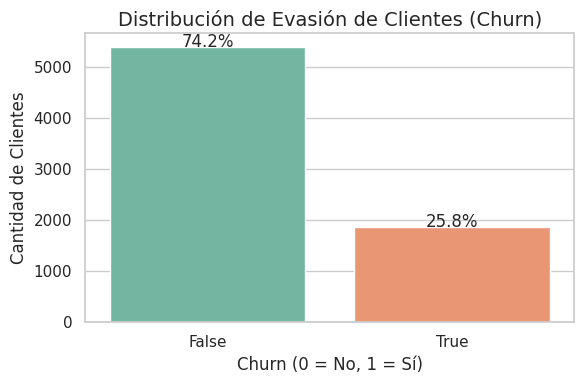

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


plt.figure(figsize=(6, 4))

sns.countplot(x=target, data=df_model, palette='Set2')


total = len(df_model)
for p in plt.gca().patches:
    height = p.get_height()
    percentage = f"{100 * height / total:.1f}%"
    plt.text(p.get_x() + p.get_width() / 2., height + 5, percentage,
             ha="center", fontsize=12)


plt.title("Distribuci√≥n de Evasi√≥n de Clientes (Churn)", fontsize=14)

plt.xlabel("Churn (0 = No, 1 = S√≠)")
plt.ylabel("Cantidad de Clientes")
plt.tight_layout()
plt.show()

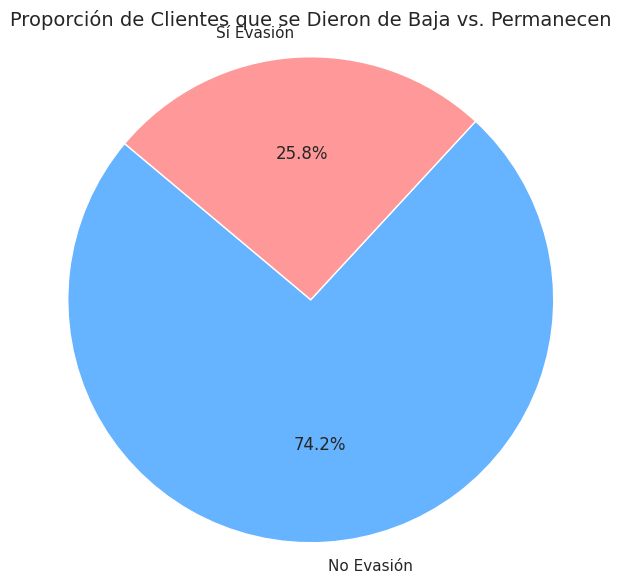

In [42]:

labels = ['No Evasi√≥n', 'S√≠ Evasi√≥n']
sizes = df_model['Churn_1'].value_counts().sort_index()
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Proporci√≥n de Clientes que se Dieron de Baja vs. Permanecen", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


#### Recuento de evasi√≥n por variables categ√≥ricas

In [43]:
df_model.columns.tolist()


['cust_SeniorCitizen',
 'cust_Partner',
 'cust_Dependents',
 'cust_tenure',
 'phone_PhoneService',
 'acct_PaperlessBilling',
 'charges_Monthly',
 'charges_Total',
 'Churn_1',
 'Churn_',
 'cust_gender_Male',
 'phone_MultipleLines_1',
 'phone_MultipleLines_No phone service',
 'net_InternetService_DSL',
 'net_InternetService_Fiber optic',
 'net_OnlineSecurity_1',
 'net_OnlineSecurity_No internet service',
 'net_OnlineBackup_1',
 'net_OnlineBackup_No internet service',
 'net_DeviceProtection_1',
 'net_DeviceProtection_No internet service',
 'net_TechSupport_1',
 'net_TechSupport_No internet service',
 'net_StreamingTV_1',
 'net_StreamingTV_No internet service',
 'net_StreamingMovies_1',
 'net_StreamingMovies_No internet service',
 'acct_Contract_One year',
 'acct_Contract_Two year',
 'acct_PaymentMethod_Credit card (automatic)',
 'acct_PaymentMethod_Electronic check',
 'acct_PaymentMethod_Mailed check',
 'Cuentas_Diarias']

In [58]:
import IPython
IPython.display.display(plt.gcf())


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [59]:
plt.show()


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline


sns.set(style="whitegrid")


Columna 'cust_gender' no encontrada.
Columna 'acct_Contract' no encontrada.
Columna 'acct_PaymentMethod' no encontrada.


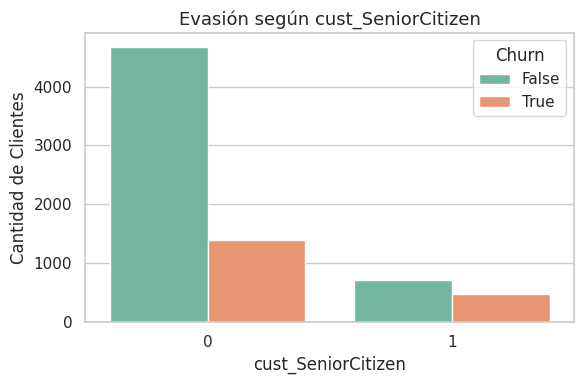

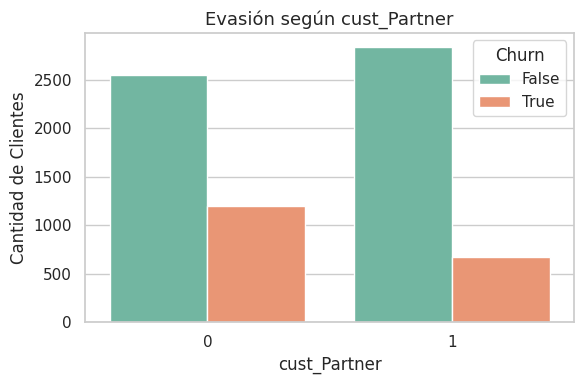

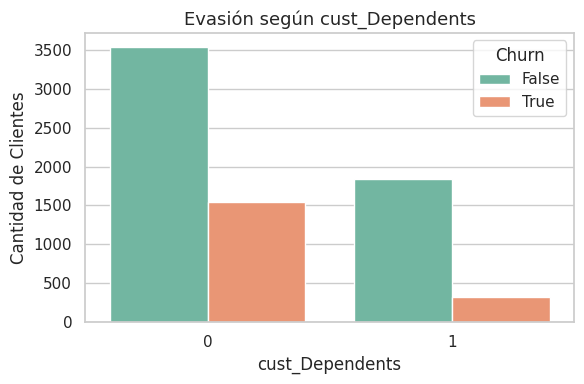

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set(style="whitegrid")


def plot_churn_by_category(df, column, target='Churn_1'):
    if column not in df.columns:
        print(f"Columna '{column}' no encontrada.")
        return


    if target not in df.columns:
         print(f"Columna target '{target}' no encontrada en el DataFrame.")
         return

    plt.figure(figsize=(6, 4))

    sns.countplot(data=df, x=column, hue=target, palette='Set2')
    plt.title(f'Evasi√≥n seg√∫n {column}', fontsize=13)
    plt.ylabel('Cantidad de Clientes')
    plt.xlabel(column)
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()


categorical_vars = [
    'cust_gender',
    'acct_Contract',
    'acct_PaymentMethod',
    'cust_SeniorCitizen',
    'cust_Partner',
    'cust_Dependents'
]


for var in categorical_vars:
    plot_churn_by_category(df_model, var) # Ahora usa el nuevo default 'Churn_1'

#### Conteo de evasi√≥n por variables num√©ricas

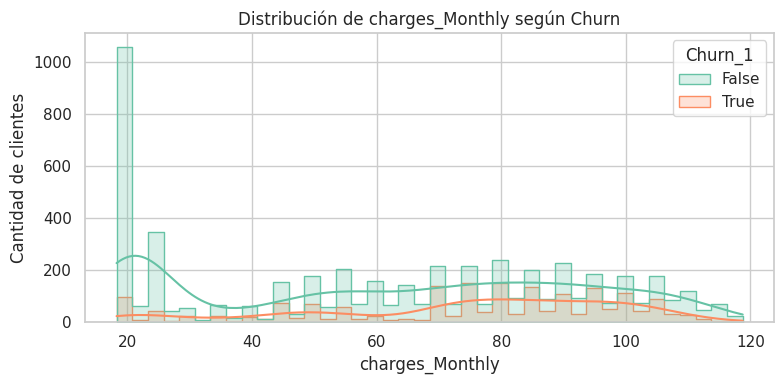

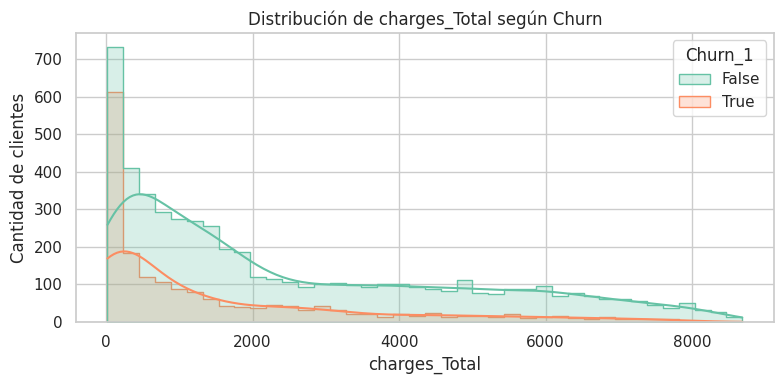

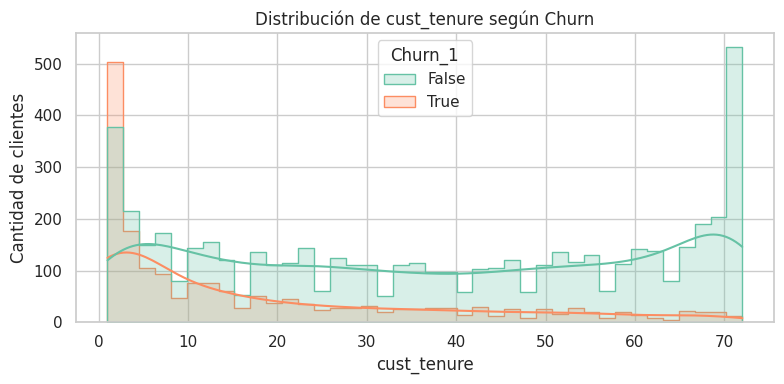

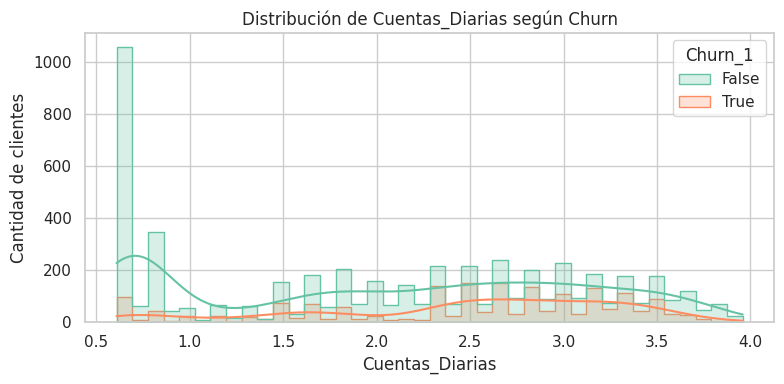

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


numeric_vars = ['charges_Monthly', 'charges_Total',
                'cust_tenure' if 'cust_tenure' in df_model.columns else 'tenure',
                'Cuentas_Diarias']


# Cambiamos el valor por defecto de 'target' a 'Churn_1'
def plot_distribution_by_churn(df, column, target='Churn_1'):

    if target not in df.columns:
         print(f"Columna target '{target}' no encontrada en el DataFrame.")
         return

    plt.figure(figsize=(8, 4))
    # Usamos la variable 'target' que ahora por defecto es 'Churn_1'
    sns.histplot(data=df, x=column, hue=target, bins=40, kde=True, palette='Set2', element='step')
    plt.title(f'Distribuci√≥n de {column} seg√∫n Churn')
    plt.xlabel(column)
    plt.ylabel('Cantidad de clientes')
    plt.tight_layout()
    plt.show()


for var in numeric_vars:
    if var in df_model.columns:

        plot_distribution_by_churn(df_model, var)


#üìÑInforme final

## Introducci√≥n
El presente an√°lisis forma parte del proyecto de Telecom X, cuyo objetivo es identificar los factores que inciden en la evasi√≥n de clientes (Churn). Actualmente, la empresa enfrenta una alta tasa de cancelaciones y busca comprender los perfiles de clientes con mayor propensi√≥n a abandonar el servicio, con el fin de anticiparse y mejorar la retenci√≥n.

 ## Limpieza y Tratamiento de Datos

 1.-Carga de datos: Se import√≥ el archivo TelecomX_Data.json localmente desde Google Colab.

2.- Normalizaci√≥n: El archivo conten√≠a estructuras anidadas, que fueron aplanadas usando pandas.json_normalize.

3.- Renombrado de columnas para simplificar el an√°lisis (customer. ‚Üí cust_, account. ‚Üí acct_, etc.).

4.- Conversi√≥n de variables:

* Se convirti√≥ la variable Churn a formato binario (1 = S√≠, 0 = No).

* Se transformaron valores tipo ‚ÄúYes/No‚Äù a 1/0.

* Se convirtieron columnas num√©ricas como charges_Total a tipo float.

5.- Creaci√≥n de variables derivadas:

Se a√±adi√≥ la columna Cuentas_Diarias, calculada como el gasto mensual dividido entre 30.



## An√°lisis Exploratorio de Datos (EDA)
**An√°lisis descriptivo**

Se calcularon estad√≠sticas centrales para variables como charges_Monthly, charges_Total, tenure y Cuentas_Diarias.

**Distribuci√≥n general de evasi√≥n**

Se observ√≥ que:

La mayor√≠a de los clientes permanecen, pero una proporci√≥n considerable (~26%) abandona el servicio.


**An√°lisis por variables categ√≥ricas**

**Contrato:** Los clientes con contrato mensual (Month-to-month) tienen tasas mucho m√°s altas de churn.

**M√©todo de pago:**

‚ÄúElectronic check‚Äù tiene una fuerte asociaci√≥n con evasi√≥n.

**Perfil demogr√°fico:**

 Adultos mayores y clientes sin pareja muestran una tendencia m√°s alta a cancelar.


**An√°lisis por variables num√©ricas**

Clientes que cancelan tienden a tener:

**Menor antig√ºedad** (tenure).

**Menor gasto total** (charges_Total).

**Mayor gasto mensual** (charges_Monthly).



## Conclusiones e Insights
* Existe una clara relaci√≥n entre la antig√ºedad del cliente y la evasi√≥n. Los nuevos clientes tienen mayor probabilidad de abandonar.

* El tipo de contrato mensual y ciertos m√©todos de pago como ‚Äúelectronic check‚Äù est√°n significativamente correlacionados con la cancelaci√≥n del servicio.

* Clientes que gastan m√°s mensualmente pero no han acumulado gasto total (por baja antig√ºedad), representan un perfil de riesgo inmediato de churn.

## Recomendaciones Estrat√©gicas
* Programa de retenci√≥n dirigido a clientes con contratos mensuales,
especialmente en sus primeros 6 meses.

* Promover m√©todos de pago autom√°ticos (como tarjeta de cr√©dito o transferencias) en lugar de pagos electr√≥nicos manuales.

* Alertas tempranas basadas en comportamiento: Crear un modelo predictivo con las variables m√°s correlacionadas con churn.

* Mejorar beneficios para clientes nuevos, promoviendo permanencia y valor a largo plazo.

## An√°lisis Extra: Correlaci√≥n entre Variables y Evasi√≥n
Como complemento del an√°lisis principal, se exploraron las relaciones estad√≠sticas entre variables num√©ricas y la evasi√≥n de clientes (Churn). El objetivo es identificar factores cuantitativos asociados al abandono del servicio, lo cual es especialmente √∫til para dise√±ar modelos predictivos de churn.

**Matriz de Correlaci√≥n**

Se gener√≥ una matriz de correlaci√≥n para analizar la relaci√≥n lineal entre la variable Churn y otras variables num√©ricas del dataset. Entre los principales hallazgos:

* Existe una correlaci√≥n negativa moderada entre tenure (antig√ºedad del cliente) y Churn, lo que sugiere que los clientes nuevos tienen m√°s probabilidad de cancelar.

* La variable charges_Total tambi√©n est√° negativamente correlacionada, ya que los clientes que llevan m√°s tiempo han acumulado m√°s gasto y presentan menos evasi√≥n.

* charges_Monthly y Cuentas_Diarias presentan una correlaci√≥n positiva leve, indicando que mayores costos mensuales pueden aumentar la evasi√≥n, aunque no es concluyente.

**Relaci√≥n entre Servicios Contratados y Evasi√≥n**

Se cre√≥ una nueva variable llamada Total_Servicios, que suma la cantidad de servicios contratados (como internet, seguridad online, l√≠neas m√∫ltiples, etc.).

**Insight clave:**

Clientes que contrataron m√°s servicios tienden a permanecer m√°s tiempo con la empresa. Esto se observa con una mediana m√°s baja de churn en clientes con 4 o m√°s servicios activos.

**Gasto Diario vs Churn**

Se evalu√≥ tambi√©n si el gasto diario (Cuentas_Diarias) influye en la evasi√≥n. Aunque se observa una ligera tendencia a mayor churn con cuentas diarias m√°s elevadas, no hay una separaci√≥n marcada, lo cual sugiere que el gasto diario por s√≠ solo no determina la cancelaci√≥n, pero podr√≠a combinarse con otras variables en un modelo m√°s robusto.

**Conclusi√≥n del An√°lisis de Correlaci√≥n**

Este an√°lisis muestra que la antig√ºedad del cliente y la cantidad total de servicios contratados son variables con mayor potencial explicativo respecto al churn. Estos factores deben ser considerados prioritarios en la construcci√≥n de modelos de predicci√≥n y estrategias de retenci√≥n.

# Extra

### An√°lisis de correlaci√≥n entre variables

### C√≥digo para generar la matriz de correlaci√≥n

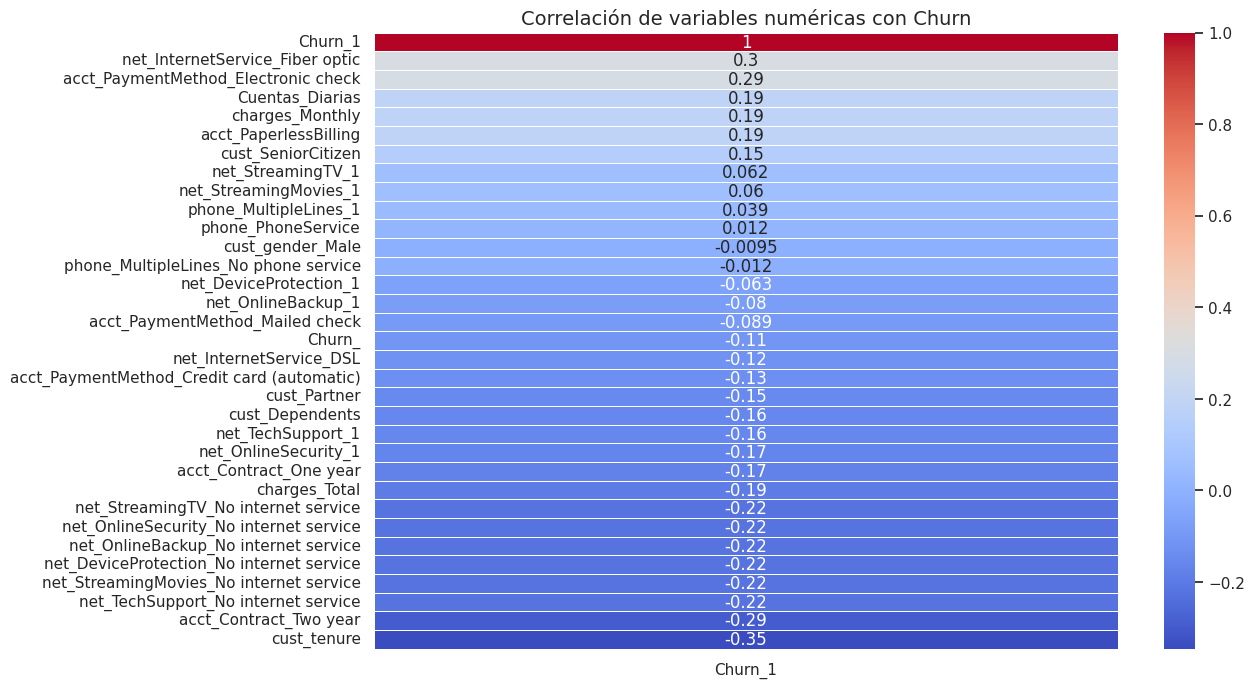

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlaci√≥n
corr_matrix = df_model.corr(numeric_only=True)

# Plot matriz de correlaci√≥n enfocada en churn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['Churn_1']].sort_values(by='Churn_1', ascending=False),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlaci√≥n de variables num√©ricas con Churn', fontsize=14)
plt.show()


### Relaci√≥n entre servicios contratados y churn

<ipython-input-75-1318912236>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_model, x='Churn_1', y='Total_Servicios', palette='Set2')


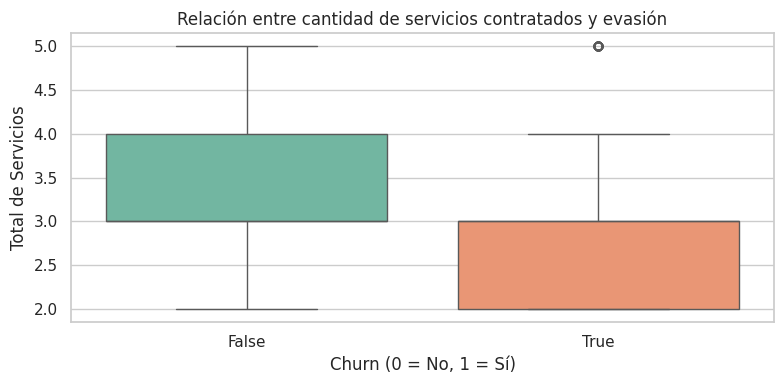

In [75]:
# Identificar columnas de servicios (binarias 1/0)
service_cols = [col for col in df_model.columns if 'Online' in col or 'Service' in col or 'Lines' in col]

# Sumar cantidad de servicios por cliente
df_model['Total_Servicios'] = df_model[service_cols].sum(axis=1)

# Visualizar relaci√≥n entre total de servicios y churn
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_model, x='Churn_1', y='Total_Servicios', palette='Set2')
plt.title('Relaci√≥n entre cantidad de servicios contratados y evasi√≥n')
plt.xlabel('Churn (0 = No, 1 = S√≠)')
plt.ylabel('Total de Servicios')
plt.tight_layout()
plt.show()


### Dispersi√≥n: Cuenta diaria vs churn

<ipython-input-77-2310337875>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_model, x='Churn_1', y='Cuentas_Diarias', palette='Set2')


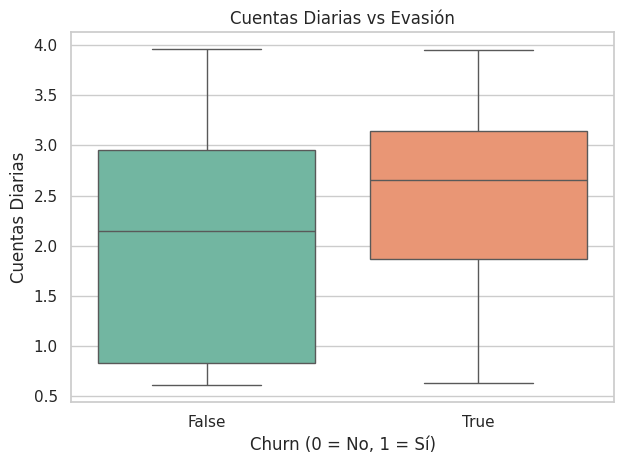

In [77]:
sns.boxplot(data=df_model, x='Churn_1', y='Cuentas_Diarias', palette='Set2')
plt.title('Cuentas Diarias vs Evasi√≥n')
plt.xlabel('Churn (0 = No, 1 = S√≠)')
plt.ylabel('Cuentas Diarias')
plt.tight_layout()
plt.show()
